In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

## Data Preparation

In [3]:
test = pd.read_csv('dengue_features_test.csv')
train_features = pd.read_csv('dengue_features_train.csv')
train_labels = pd.read_csv('dengue_labels_train.csv')
submission_format = pd.read_csv('submission_format.csv')

In [4]:
train_features

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [5]:
train_labels

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [6]:
train_df = train_features
train_df['total_cases'] = train_labels.total_cases
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

### 1. Set time to index

No discrepancies found. 'week_start_date' aligns with 'year' and 'weekofyear'.

In [7]:
# Set 'week_start_date' as the index of the DataFrame
train_df['week_start_date'] = pd.to_datetime(train_df['week_start_date'])
train_df.set_index(['week_start_date'], inplace=True)

In [8]:
# Leave weeks for seasonality
train_df = train_df.drop('year', axis=1)

In [9]:
train_df.index

DatetimeIndex(['1990-04-30', '1990-05-07', '1990-05-14', '1990-05-21',
               '1990-05-28', '1990-06-04', '1990-06-11', '1990-06-18',
               '1990-06-25', '1990-07-02',
               ...
               '2010-04-23', '2010-04-30', '2010-05-07', '2010-05-14',
               '2010-05-21', '2010-05-28', '2010-06-04', '2010-06-11',
               '2010-06-18', '2010-06-25'],
              dtype='datetime64[ns]', name='week_start_date', length=1456, freq=None)

### 2. Normalized difference vegetation index (NDVI)

Value Range: NDVI values range from -1 to +1.
Negative Values: Usually indicate water.
Values Close to Zero: Represent barren areas of rock, sand, or snow.
Low Positive Values (0.1 - 0.3): Typically indicate shrubbery and grasslands.
High Positive Values (0.6 - 0.9): Suggest dense vegetation such as forests.

#### Fill NaN with the most recent non-missing value encountered

In [10]:
train_df['ndvi_nw'].fillna(method='ffill', inplace=True)

In [11]:
train_df['ndvi_ne'].fillna(method='ffill', inplace=True)

In [12]:
train_df['ndvi_se'].fillna(method='ffill', inplace=True)

In [13]:
train_df['ndvi_sw'].fillna(method='ffill', inplace=True)

#### Calculate ndvi-mean

In [14]:
train_df['ndvi'] = train_df[['ndvi_nw','ndvi_ne', 'ndvi_se', 'ndvi_sw']].mean(axis=1)
train_df = train_df.drop(['ndvi_nw','ndvi_ne', 'ndvi_se', 'ndvi_sw'], axis=1)

### 3. Precipitation

1. NOAA's GHCN Daily Climate Data (station_precip_mm)
Source: Ground-based weather stations.
Measurement: This provides the total precipitation measured in millimeters at a specific weather station location.
Pros:
Direct measurements from the ground provide accurate local data.
Useful for understanding precipitation at a specific point.
Cons:
Limited by the geographical coverage of weather stations.
Might not represent wider regional climatic conditions if stations are sparse.
2. NOAA's NCEP Climate Forecast System Reanalysis (reanalysis_precip_amt_kg_per_m2)
Source: Reanalysis data combining model data with observations.
Measurement: Total precipitation in kilograms per square meter, usually converted from the original model units.
Pros:
Provides a continuous spatial representation, useful for areas without weather stations.
Good for large-scale climatic trends and patterns.
Cons:
Less accurate at local scales compared to direct measurements.
Dependent on the quality of the model and assimilated data.
3. PERSIANN Satellite Precipitation Measurements (precipitation_amt_mm)
Source: Satellite observations.
Measurement: Precipitation amount in millimeters, estimated from satellite data.
Pros:
Wide coverage, especially beneficial for remote or oceanic regions.
Useful for studying large-scale weather systems and spatial precipitation patterns.
Cons:
Satellite estimations can be less accurate than ground measurements, especially for localized events.
May have latency issues compared to real-time ground data.

In [15]:
train_df[['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm', 'station_precip_mm']]

,precipitation_amt_mm,reanalysis_precip_amt_kg_per_m2,reanalysis_sat_precip_amt_mm,station_precip_mm
week_start_date,,,,
1990-04-30,12.42,32.00,12.42,16.0
1990-05-07,22.82,17.94,22.82,8.6
1990-05-14,34.54,26.10,34.54,41.4
1990-05-21,15.36,13.90,15.36,4.0
1990-05-28,7.52,12.20,7.52,5.8
...,...,...,...,...
2010-05-28,55.30,45.00,55.30,27.0
2010-06-04,86.47,207.10,86.47,36.6
2010-06-11,58.94,50.60,58.94,7.4


In [16]:
#(train_df['precipitation_amt_mm'] - train_df['reanalysis_sat_precip_amt_mm']).sum()

As 'reanalysis_sat_precip_amt_mm' has the same data I will drop it. I will also drop station_precip_mm as it is less accurate and reanalysis_precip_amt_kg_per_m2 as it has outliers

#### Fill NaN with the most recent non-missing value encountered

In [17]:
train_df['precipitation_amt_mm'].fillna(method='ffill', inplace=True)
train_df['reanalysis_precip_amt_kg_per_m2'].fillna(method='ffill', inplace=True)

#### Check for correlation between precipitation_amt_mm and reanalysis_precip_amt_kg_per_m2 and total_cases

In [18]:
# Assuming df is your DataFrame
# Calculating the correlation matrix
correlation_matrix = train_df[['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'total_cases']].corr()

# Print the correlation matrix
print(correlation_matrix)

                                 precipitation_amt_mm  \
precipitation_amt_mm                         1.000000   
reanalysis_precip_amt_kg_per_m2              0.481093   
total_cases                                 -0.042712   

                                 reanalysis_precip_amt_kg_per_m2  total_cases  
precipitation_amt_mm                                    0.481093    -0.042712  
reanalysis_precip_amt_kg_per_m2                         1.000000    -0.011553  
total_cases                                            -0.011553     1.000000  


There does not seem to be a correlation between the two precipitation variables and also the correlation with the number of Dengue cases is very low.

In [19]:
train_df = train_df.drop(['reanalysis_sat_precip_amt_mm','station_precip_mm'], axis=1)

### 4. Humidity

Relative Humidity (reanalysis_relative_humidity_percent)
Definition: Relative humidity is the ratio of the current absolute humidity to the highest possible absolute humidity (which depends on the current air temperature). It is expressed as a percentage.

Specific Humidity (reanalysis_specific_humidity_g_per_kg)
Definition: Specific humidity is a ratio of the mass of water vapor to the total mass of the air parcel. It is expressed in grams of water vapor per kilogram of air (g/kg).
Interpretation: Specific humidity is not dependent on the temperature of the air. It is a measure of the actual amount of moisture in the air.


In [44]:
train_df[['reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg']].head(5)

,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg
week_start_date,,
1990-04-30,73.365714,14.012857
1990-05-07,77.368571,15.372857
1990-05-14,82.052857,16.848571
1990-05-21,80.337143,16.672857
1990-05-28,80.460000,17.210000


In [22]:
# Calculating the correlation matrix
correlation_matrix = train_df[['reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'total_cases']].corr()

# Print the correlation matrix
print(correlation_matrix)

                                       reanalysis_relative_humidity_percent  \
reanalysis_relative_humidity_percent                               1.000000   
reanalysis_specific_humidity_g_per_kg                              0.577813   
total_cases                                                       -0.132452   

                                       reanalysis_specific_humidity_g_per_kg  \
reanalysis_relative_humidity_percent                                0.577813   
reanalysis_specific_humidity_g_per_kg                               1.000000   
total_cases                                                         0.129861   

                                       total_cases  
reanalysis_relative_humidity_percent     -0.132452  
reanalysis_specific_humidity_g_per_kg     0.129861  
total_cases                               1.000000  


### 5. Temperature

In [23]:
# Calculating the correlation matrix
correlation_matrix = train_df[['reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'total_cases']].corr()

# Print the correlation matrix
print(correlation_matrix)

                                       reanalysis_relative_humidity_percent  \
reanalysis_relative_humidity_percent                               1.000000   
reanalysis_specific_humidity_g_per_kg                              0.577813   
total_cases                                                       -0.132452   

                                       reanalysis_specific_humidity_g_per_kg  \
reanalysis_relative_humidity_percent                                0.577813   
reanalysis_specific_humidity_g_per_kg                               1.000000   
total_cases                                                         0.129861   

                                       total_cases  
reanalysis_relative_humidity_percent     -0.132452  
reanalysis_specific_humidity_g_per_kg     0.129861  
total_cases                               1.000000  


In [24]:
train_df = train_df.drop(['reanalysis_max_air_temp_k','reanalysis_min_air_temp_k', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_tdtr_k'], axis=1)

In [25]:
# As reanalysis_dew_point_temp_k is directly correlated with reanalysis_specific_humidity_g_per_kg
train_df = train_df.drop('reanalysis_dew_point_temp_k', axis=1)

In [26]:
train_df_temp = train_df.drop('city', axis=1)

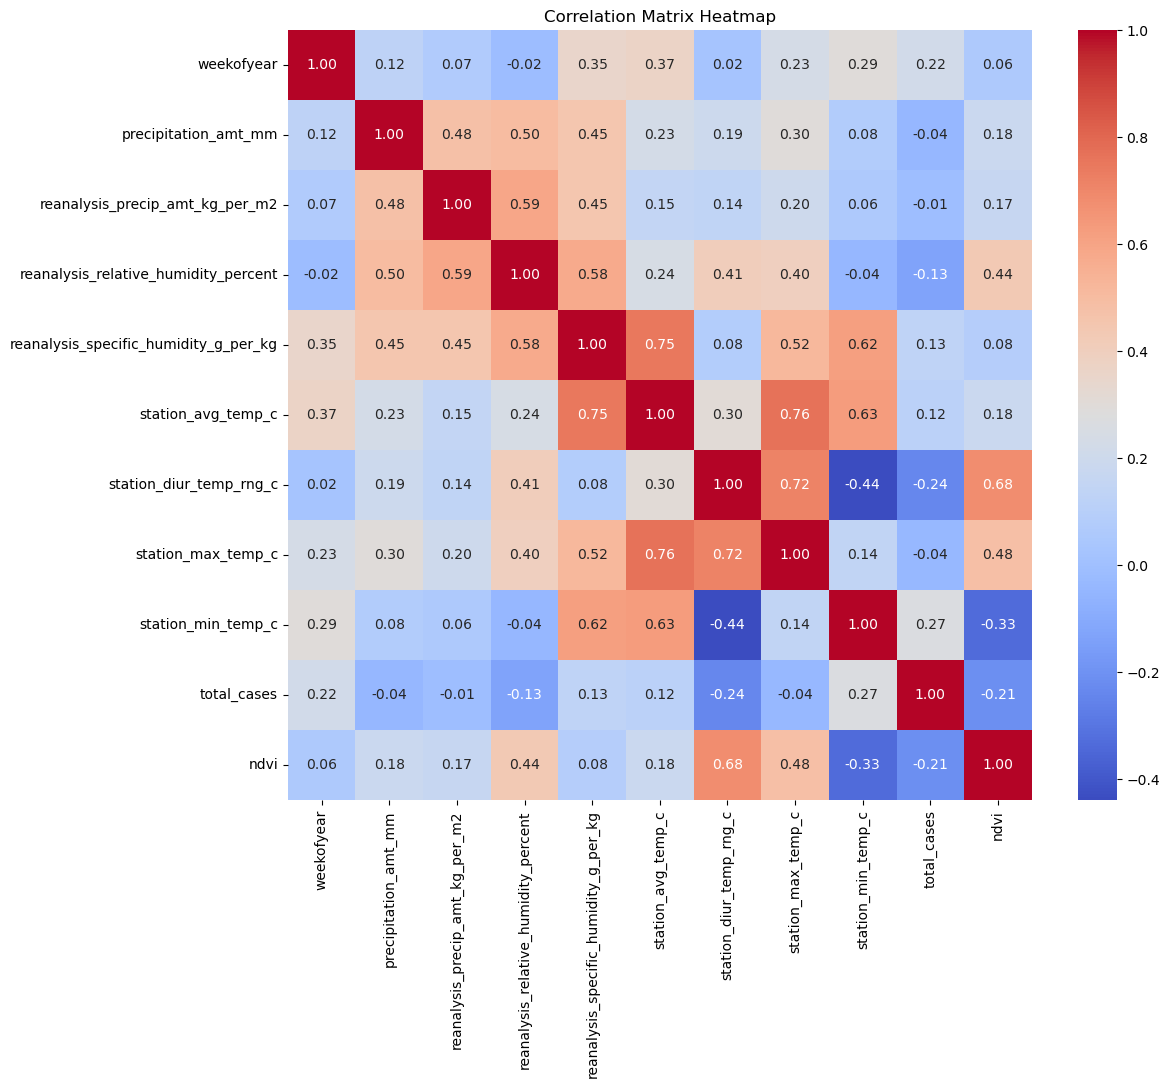

In [27]:
# Calculating the correlation matrix
correlation_matrix = train_df_temp.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  # You can adjust the size of the figure here
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [45]:
# Flatten the correlation matrix to a Series, reset the index to turn it into a DataFrame
corr_series = correlation_matrix.unstack().reset_index()

# Rename the columns for clarity
corr_series.columns = ['Variable_1', 'Variable_2', 'Correlation']

# Filter out self-correlations and duplicates
corr_series_filtered = corr_series[corr_series['Variable_1'] != corr_series['Variable_2']].copy()

# Create an absolute value column for sorting
corr_series_filtered['Abs_Correlation'] = corr_series_filtered['Correlation'].abs()

# Sort by absolute correlation to get the highest correlations
corr_series_filtered = corr_series_filtered.sort_values(by='Abs_Correlation', ascending=False)

# Drop duplicates, keeping the first occurrence (highest correlation)
corr_series_filtered.drop_duplicates(subset=['Abs_Correlation'], keep='first', inplace=True)

corr_series_filtered.head(10)

,Variable_1,Variable_2,Correlation,Abs_Correlation
82,station_max_temp_c,station_avg_temp_c,0.764576,0.764576
49,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,0.747809,0.747809
83,station_max_temp_c,station_diur_temp_rng_c,0.715217,0.715217
116,ndvi,station_diur_temp_rng_c,0.681035,0.681035
93,station_min_temp_c,station_avg_temp_c,0.633252,0.633252
52,reanalysis_specific_humidity_g_per_kg,station_min_temp_c,0.623155,0.623155
35,reanalysis_relative_humidity_percent,reanalysis_precip_amt_kg_per_m2,0.593928,0.593928
37,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,0.577813,0.577813
81,station_max_temp_c,reanalysis_specific_humidity_g_per_kg,0.519376,0.519376
14,precipitation_amt_mm,reanalysis_relative_humidity_percent,0.500248,0.500248


There are no missing values in consequent days (see code for check_up below). If there would have been gaps over several days the fillna method would not have been useful

In [30]:
# Filter the DataFrame for rows where 'station_avg_temp_c' is NaN
#nan_temp_df = train_df[train_df['station_avg_temp_c'].isna()]

# Sort the filtered DataFrame by 'week_start_date'
#sorted_nan_temp_df = nan_temp_df.sort_values(by='week_start_date')

# Display the sorted DataFrame
#print(sorted_nan_temp_df)

In [31]:
train_df.fillna(method='ffill', inplace=True)

### 6. Check for outliers and wrong values

In [32]:
train_df['precipitation_amt_mm'].describe()

count    1456.000000
mean       45.686937
std        43.779318
min         0.000000
25%         9.655000
50%        38.235000
75%        70.227500
max       390.600000
Name: precipitation_amt_mm, dtype: float64

<Axes: >

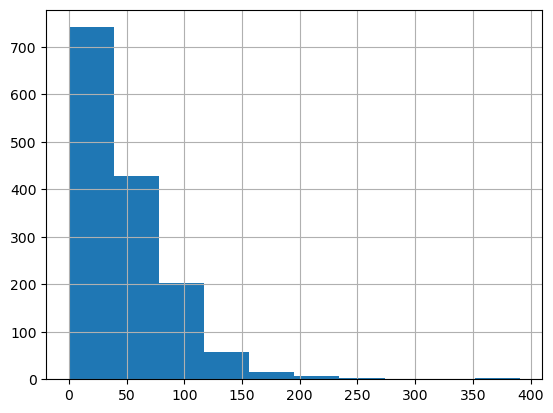

In [33]:
train_df['precipitation_amt_mm'].hist()

In [34]:
train_df['reanalysis_precip_amt_kg_per_m2'].describe()

count    1456.000000
mean       40.111635
std        43.329174
min         0.000000
25%        13.085000
50%        27.245000
75%        52.200000
max       570.500000
Name: reanalysis_precip_amt_kg_per_m2, dtype: float64

In [36]:
train_df['station_max_temp_c'].describe()

count    1456.000000
mean       32.443338
std         1.960769
min        26.700000
25%        31.100000
50%        32.800000
75%        33.900000
max        42.200000
Name: station_max_temp_c, dtype: float64

In [37]:
train_df['station_min_temp_c'].describe()

count    1456.000000
mean       22.099863
std         1.569113
min        14.700000
25%        21.100000
50%        22.200000
75%        23.300000
max        25.600000
Name: station_min_temp_c, dtype: float64

In [38]:
train_df['reanalysis_specific_humidity_g_per_kg'].describe()

count    1456.000000
mean       16.745565
std         1.542276
min        11.715714
25%        15.560000
50%        17.087143
75%        17.977500
max        20.461429
Name: reanalysis_specific_humidity_g_per_kg, dtype: float64

In [39]:
train_df['ndvi'].describe()

count    1456.000000
mean        0.165983
std         0.091297
min        -0.092565
25%         0.099066
50%         0.146623
75%         0.226426
max         0.503982
Name: ndvi, dtype: float64


We decided to not take out any outliers (e.g. precipitation) as they might be causing virus outbreaks

## Setting up a Preprocessing Function

The following preprocessing function was just a starting point. We later on used other methods to fill missing gaps (interpolation) and also always tried different feature combinations and checking significance depending on the time frame set and the model used

In [40]:
def preprocess_data(data_path, labels_path=None):
    
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path)
    
    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path)
        df = df.merge(labels['total_cases'], left_index=True, right_index=True)
    
    # Convert 'week_start_date' to datetime format
    df['week_start_date'] = pd.to_datetime(df['week_start_date'])
    
    # Set 'week_start_date' as the index of the DataFrame
    df.set_index('week_start_date', inplace=True)
    df = df.drop('year', axis=1)
    
    # add new features
    df['ndvi'] = df[['ndvi_nw','ndvi_ne', 'ndvi_se', 'ndvi_sw']].mean(axis=1)
    
    # drop features with low significance/multiple existing features ordered by topic
    df = df.drop(['ndvi_nw','ndvi_ne', 'ndvi_se', 'ndvi_sw'], axis=1)
    df = df.drop(['reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm', 'station_precip_mm'], axis=1)
    df = df.drop(['reanalysis_max_air_temp_k','reanalysis_min_air_temp_k', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_tdtr_k'], axis=1)
    df = df.drop(['reanalysis_relative_humidity_percent'], axis=1)
    
    # fill missing values
    df.fillna(method='ffill', inplace=True)
    
    # separate san juan and iquitos
    sj = df[df['city'] == 'sj'].drop('city', axis=1)
    iq = df[df['city'] == 'iq'].drop('city', axis=1)
    
    return sj, iq

In [41]:
sj_train, iq_train = preprocess_data(data_path='dengue_features_train.csv', labels_path="dengue_labels_train.csv")

In [42]:
sj_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 936 entries, 1990-04-30 to 2008-04-22
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   weekofyear                             936 non-null    int64  
 1   precipitation_amt_mm                   936 non-null    float64
 2   reanalysis_dew_point_temp_k            936 non-null    float64
 3   reanalysis_specific_humidity_g_per_kg  936 non-null    float64
 4   station_avg_temp_c                     936 non-null    float64
 5   station_diur_temp_rng_c                936 non-null    float64
 6   station_max_temp_c                     936 non-null    float64
 7   station_min_temp_c                     936 non-null    float64
 8   total_cases                            936 non-null    int64  
 9   ndvi                                   936 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 80.4 KB


##### 

We used the following plot to check if there are significant changes in the features before an outbreak and if yes, how many weeks before the outbreak. However, we could not see any clear pattern


Text(0, 0.5, 'Avg Temp (C)')

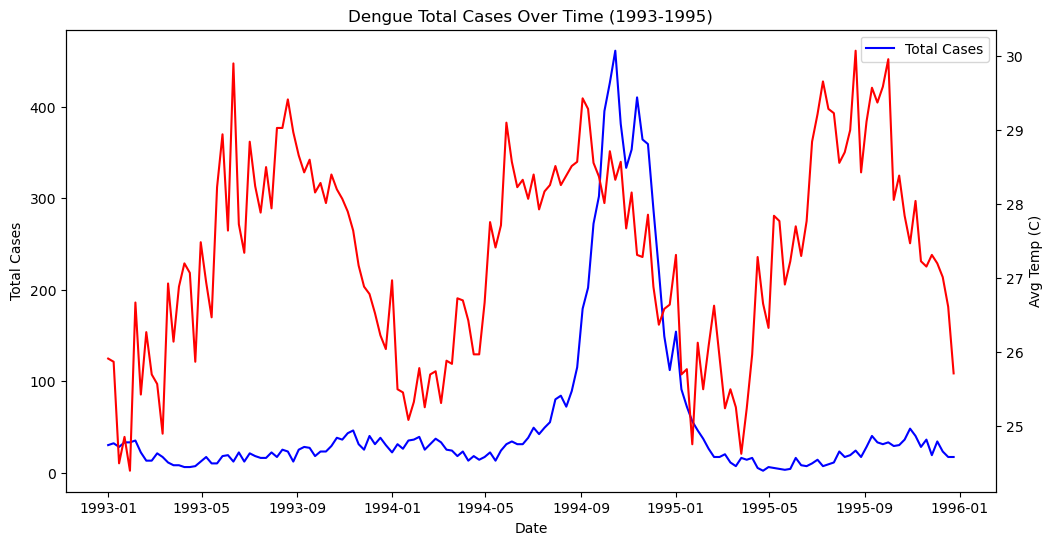

In [43]:
# Define the date range you want to include in your plot
start_year = 1993
end_year = 1995

# Filter the data for the desired years
filtered_df = sj_train[(sj_train.index.year >= start_year) & (sj_train.index.year <= end_year)]

# Create a figure
plt.figure(figsize=(12, 6))

# Plot the filtered "total_cases" data over time
plt.plot(filtered_df.index, filtered_df['total_cases'], label="Total Cases", color='blue')
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title(f"Dengue Total Cases Over Time ({start_year}-{end_year})")
plt.legend()

# Adding temperature data over time
plt.twinx()  # Create a second y-axis on the right for temperature data
plt.plot(filtered_df.index, filtered_df['station_avg_temp_c'], label="Avg Temp", color='red')
plt.ylabel("Avg Temp (C)")